# Gradient Descent - Lab

## Introduction

In this lab, you'll continue to formalize your knowledge of gradient descent by coding the algorithm yourself. In the upcoming labs, you'll apply similar procedures to implement logistic regression on your own.

## Objectives
You will be able to:
* Create a full gradient descent algorithm

## Using Gradient Descent to Minimize OLS

In order to practice gradient descent, you'll investigate a simple regression case in which you're looking to minimize the Residual Sum of Squares (RSS) between the predictions and the actual values. Remember that this is referred to Ordinary Least Squares (OLS) regression. Below, is a mock dataset that to work with. Preview the dataset. Then, you'll compare two simplistic models. From there, you'll use gradient descent to improve upon these  initial models.

## Loading the Dataset

In [5]:
#The dataset
import pandas as pd
df = pd.read_excel('movie_data.xlsx')
df.head()

,budget,domgross,title
0,13000000,25682380,21 &amp; Over
1,45658735,13414714,Dredd 3D
2,20000000,53107035,12 Years a Slave
3,61000000,75612460,2 Guns
4,40000000,95020213,42


## Two Simplistic Models

Imagine someone is attempting to predict the domestic gross sales of a movie based on the movie's budget, or at least further investigate how these two quantities are related. Two models are suggested, and need to be compared.  
The two models are:  
$\text{domgross} = 1.575 \cdot \text{budget}$  
$\text{domgross} = 1.331 \cdot \text{budget}$  
Here's a graph of the two models along with the actual data:

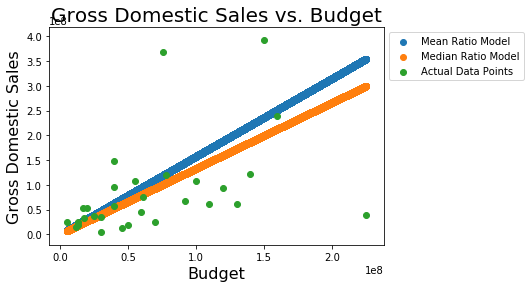

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(start=df.budget.min(), stop=df.budget.max(), num=10**5)
plt.scatter(x, 1.575*x, label='Mean Ratio Model') #Model 1
plt.scatter(x, 1.331*x, label='Median Ratio Model') #Model 2
plt.scatter(df.budget, df.domgross, label='Actual Data Points')
plt.title('Gross Domestic Sales vs. Budget', fontsize=20)
plt.xlabel('Budget', fontsize=16)
plt.ylabel('Gross Domestic Sales', fontsize=16)
plt.legend(bbox_to_anchor=(1,1))

## Error/Loss Functions

In order to compare the two models (and future ones), a metric for evaluating and comparing models to each other is needed. Traditionally this is the residual sum of squares. As such you are looking to minimize  $ \sum(\hat{y}-y)^2$.
Write a function **rss(m)** which calculates the residual sum of squares for a simplistic model $\text{domgross} = m \cdot \text{budget}$.

In [23]:
X=df.budget
y=df.domgross

def rss(m, X, y):
    rsstotal=0
    for i in range(len(X)):
        rsstotal += (m*X[i]-y[i])**2
    
    return rsstotal

## Run your RSS function on the two models
Which of the two models is better?

In [24]:
# Your code here
print ('rss for 1.575 : ' , rss(1.575, X,y))
print ('rss for 1.331 : ' , rss(1.331, X,y))

rss for 1.575 :  2.7614512142376128e+17
rss for 1.331 :  2.3547212057814554e+17


In [25]:
# Your response here

# second model has less rss . so it it better.

## Gradient Descent

Now that you have a loss function, you can use numerical methods to find a minimum to the loss function. By minimizing the loss function, you have achieved an optimal solution according to the problem formulation. Here's the outline of gradient descent from the previous lesson:  

1. Define initial parameters:
    1. pick a starting point
    2. pick a step size $\alpha$ (alpha)
    3. choose a maximum number of iterations; the algorithm will terminate after this many iterations if a minimum has yet to be found
    4. (optionally) define a precision parameter; similar to the maximum number of iterations, this will terminate the algorithm early. For example, one might define a precision parameter of 0.00001, in which case if the change in the loss function were less then 0.00001, the algorithm would terminate. The idea is that we are very close to the bottom and further iterations would make a negligible difference.
2. Calculate the gradient at the current point (initially, the starting point)
3. Take a step (of size alpha) in the direction of the gradient
4. Repeat steps 2 and 3 until the maximum number of iterations is met, or the difference between two points is less then your precision parameter  

To start, visualize the cost function. Plot the cost function output for a range of m values from -3 to 5.

In [31]:
import numpy as np

# Your code here
mvalue=np.linspace(-3,5, 100)
lossm=[]
for i in mvalue:
    #print (rss(i, X , y))
    lossm.append(rss(i, X , y))
    
lossm

[3.8851602875095327e+18,
 3.7412888367878354e+18,
 3.6002987896137836e+18,
 3.462190145987378e+18,
 3.326962905908616e+18,
 3.194617069377499e+18,
 3.0651526363940275e+18,
 2.9385696069582024e+18,
 2.814867981070021e+18,
 2.694047758729486e+18,
 2.576108939936596e+18,
 2.4610515246913505e+18,
 2.348875512993751e+18,
 2.2395809048437957e+18,
 2.133167700241486e+18,
 2.0296358991868214e+18,
 1.928985501679802e+18,
 1.8312165077204283e+18,
 1.7363289173086996e+18,
 1.6443227304446154e+18,
 1.5551979471281772e+18,
 1.4689545673593838e+18,
 1.3855925911382354e+18,
 1.3051120184647327e+18,
 1.2275128493388751e+18,
 1.1527950837606621e+18,
 1.0809587217300946e+18,
 1.0120037632471725e+18,
 9.459302083118952e+17,
 8.827380569242636e+17,
 8.224273090842769e+17,
 7.649979647919354e+17,
 7.10450024047239e+17,
 6.587834868501875e+17,
 6.099983532007816e+17,
 5.6409462309902074e+17,
 5.210722965449052e+17,
 4.8093137353843494e+17,
 4.4367185407960954e+17,
 4.092937381684296e+17,
 3.777970258048946e

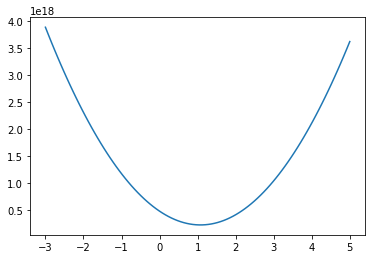

In [30]:
  
    
plt.plot(mvalue, lossm)
#plt.plot(X, lossm1)





As you can see, this is a simple cost function. The minimum is clearly around 1. With that, it's time to implement gradient descent in order to find the optimal value for m.

In [37]:

cur_x = 1.5 # The algorithm starts at x=1.5
alpha = 1*10**(-7) # step size multiplier
print(alpha)
precision = 0.0000000001
previous_step_size = 1 
max_iters = 10000 # maximum number of iterations
iters = 0 #iteration counter

#Create a loop to iterate through the algorithm until either the max_iteration or precision conditions is met
while (previous_step_size > precision) & (iters < max_iters):
    print('Current value: {} RSS Produced: {}'.format(cur_x, rss(cur_x, X,y)))
    prev_x = cur_x
    #Calculate the gradient. This is often done by hand to reduce computational complexity.
    #For here, generate points surrounding your current state, then calculate the rss of these points
    #Finally, use the np.gradient() method on this survey region. This code is provided here to ease this portion of the algorithm implementation
    x_survey_region = np.linspace(start = cur_x - previous_step_size , stop = cur_x + previous_step_size , num = 101)
    rss_survey_region = [np.sqrt(rss(m, X,y)) for m in x_survey_region]
    gradient = np.gradient(rss_survey_region)[50] 
    cur_x -= alpha * gradient #Move opposite the gradient
    previous_step_size = abs(cur_x - prev_x)
    iters+=1

print ('The local minimum occurs at',cur_x)

#The output for the above will be: ('The local minimum occurs at', 1.1124498053361267)

1e-07
Current value: 1.5 RSS Produced: 2.6084668957174006e+17
Current value: 1.133065571442482 RSS Produced: 2.2177730533770314e+17
Current value: 1.1131830522748978 RSS Produced: 2.2135715390729424e+17
Current value: 1.1124754156940848 RSS Produced: 2.2134541499866906e+17
Current value: 1.1124506992634624 RSS Produced: 2.2134500897406422e+17
Current value: 1.1124498365366489 RSS Produced: 2.213449948066475e+17
Current value: 1.1124498064238697 RSS Produced: 2.213449943121512e+17
Current value: 1.1124498053728074 RSS Produced: 2.213449942948912e+17
The local minimum occurs at 1.1124498053361267


## Plot the minimum on your graph
Replot the RSS cost curve as above. Add a red dot for the minimum of this graph using the solution from your gradient descent function above.

Text(0.5,1,'RSS Loss Function for Various Values of m, with minimum marked')

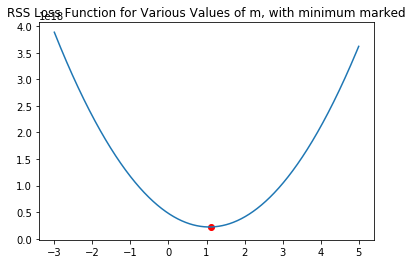

In [41]:
# Your code here

x = np.linspace(start=-3, stop=5, num=10**3)
y1 = [rss(xi,X,y) for xi in x]
plt.plot(x, y1)
plt.scatter(cur_x, rss(cur_x, X, y), c='red')
plt.title('RSS Loss Function for Various Values of m, with minimum marked')

## Summary 

In this lab you coded up a gradient descent algorithm from scratch! In the next lab, you'll apply this to logistic regression in order to create a full implementation yourself!